2012-12-01 00:00:00+00:00


C:\Users\paliw\anaconda3\envs\zip38\lib\site-packages\pyfolio\timeseries.py:734: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2012-12-03
End date,2022-12-01
Total months,119
,Backtest
Annual return,30.447%
Cumulative returns,1325.244%
Annual volatility,20.286%
Sharpe ratio,1.41
Calmar ratio,0.71
Stability,0.88
Max drawdown,-42.97%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,42.97,2020-02-13,2020-03-23,2020-06-25,96
1,21.81,2022-04-26,2022-06-20,NaT,NaN
2,20.73,2018-01-08,2019-08-23,2019-11-22,490
3,20.41,2015-10-23,2016-12-23,2017-04-05,379
4,16.28,2022-01-19,2022-02-24,2022-04-13,61


C:\Users\paliw\anaconda3\envs\zip38\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\paliw\anaconda3\envs\zip38\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\paliw\anaconda3\envs\zip38\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


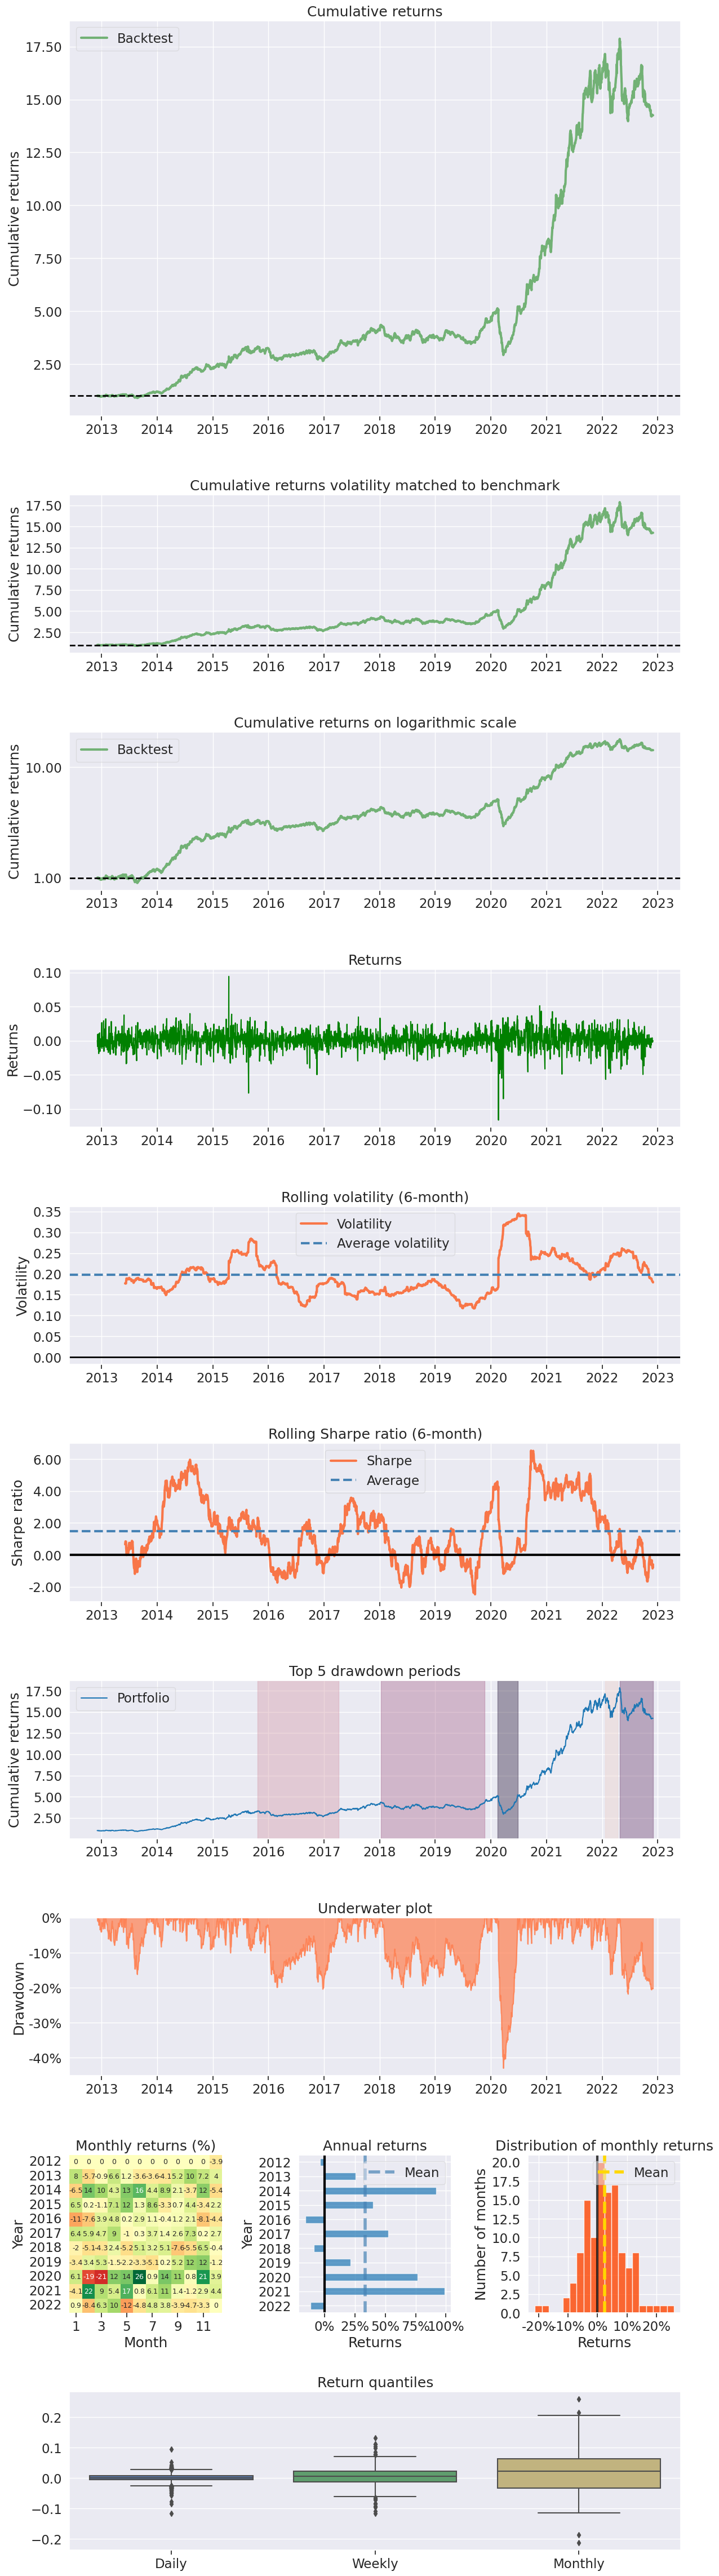

In [2]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import a few libraries we need
from zipline import run_algorithm

from zipline.api import order_target_percent, symbol,  \
    schedule_function, date_rules, time_rules
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import pandas as pd
import pyfolio as pf

def initialize(context):
    # Which stock to trade
    dji = [
        "3MINDIA",
"ABB",
"ACC",
"AIAENG",
"APLAPOLLO",
"AUBANK",
"AARTIDRUGS",
"AAVAS",
"ABBOTINDIA",
"ADANIENT",
"ADANIGREEN",
"ADANIPORTS",
"ATGL",
"ADANITRANS",
"AWL",
"ABCAPITAL",
"ABFRL",
"ABSLAMC",
"AEGISCHEM",
"AETHER",
"AFFLE",
"AJANTPHARM",
"APLLTD",
"ALKEM",
"ALKYLAMINE",
"ALLCARGO",
"ALOKINDS",
"AMARAJABAT",
"AMBER",
"AMBUJACEM",
"ANGELONE",
"ANURAS",
"APOLLOHOSP",
"APOLLOTYRE",
"APTUS",
"ASAHIINDIA",
"ASHOKLEY",
"ASIANPAINT",
"ASTERDM",
"ASTRAZEN",
"ASTRAL",
"ATUL",
"AUROPHARMA",
"AVANTIFEED",
"DMART",
"AXISBANK",
"BASF",
"BSE",
"BAJAJ-AUTO",
"BAJAJELEC", 
    ]
    
   # Make symbol list from tickers
    context.universe = [symbol(s) for s in dji]
    
    # History window
    context.history_window = 20
    
    # Size of our portfolio
    context.stocks_to_hold = 10
    
    # Schedule the daily trading routine for once per month
    schedule_function(handle_data, date_rules.month_start(), time_rules.market_close())    
    
def month_perf(ts):
    perf = (ts[-1] / ts[0]) - 1
    return perf
    
def handle_data(context, data):
    # Get history for all the stocks.
    hist = data.history(context.universe, "close", context.history_window, "1d")
    
    # This creates a table of percent returns, in order.
    perf_table = hist.apply(month_perf).sort_values(ascending=False)

    # Make buy list of the top N stocks
    buy_list = perf_table[:context.stocks_to_hold]
    
    # The rest will not be held.
    the_rest = perf_table[context.stocks_to_hold:]
    
    # Place target buy orders for top N stocks.
    for stock, perf in buy_list.iteritems():
        stock_weight = 1 / context.stocks_to_hold

        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, stock_weight)

    # Make sure we are flat the rest.
    for stock, perf in the_rest.iteritems():
        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, 0.0)     
            
def analyze(context, perf):
    # Use PyFolio to generate a performance report
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    

# Set start and end date
start = pd.Timestamp('2012-12-01', tz='utc')
end = pd.Timestamp('2022-12-01', tz='utc')

# Fire off the backtest
results = run_algorithm(start=start, end=end, 
                                initialize=initialize, analyze=analyze, 
                                handle_data=handle_data, 
                                capital_base=10000, 
                                data_frequency = 'daily', bundle='yahoo_NSE' ) 